***Participantes (RM - NOME):***<br>
Vitor Luiz Carvalhal - 337129<br>
Ricardo Fabbro Antonelli - 339505<br>
Bartira Lira Lafiandre - 340177<br>
Tiago Batista Pessoa - 339575<br>

## 0.Bibliotecas e afins

In [38]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, plot_confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import mean_squared_error

from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras.utils.vis_utils import plot_model

import pydot
import csv


In [17]:
url = 'https://telescopeinstorage.blob.core.windows.net/datasets/DadosSpotify.csv'
dataset = pd.read_csv(url, sep=',', engine='python',encoding='utf8')

## 1. Analisando os dados

In [18]:
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [20]:
dataset.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


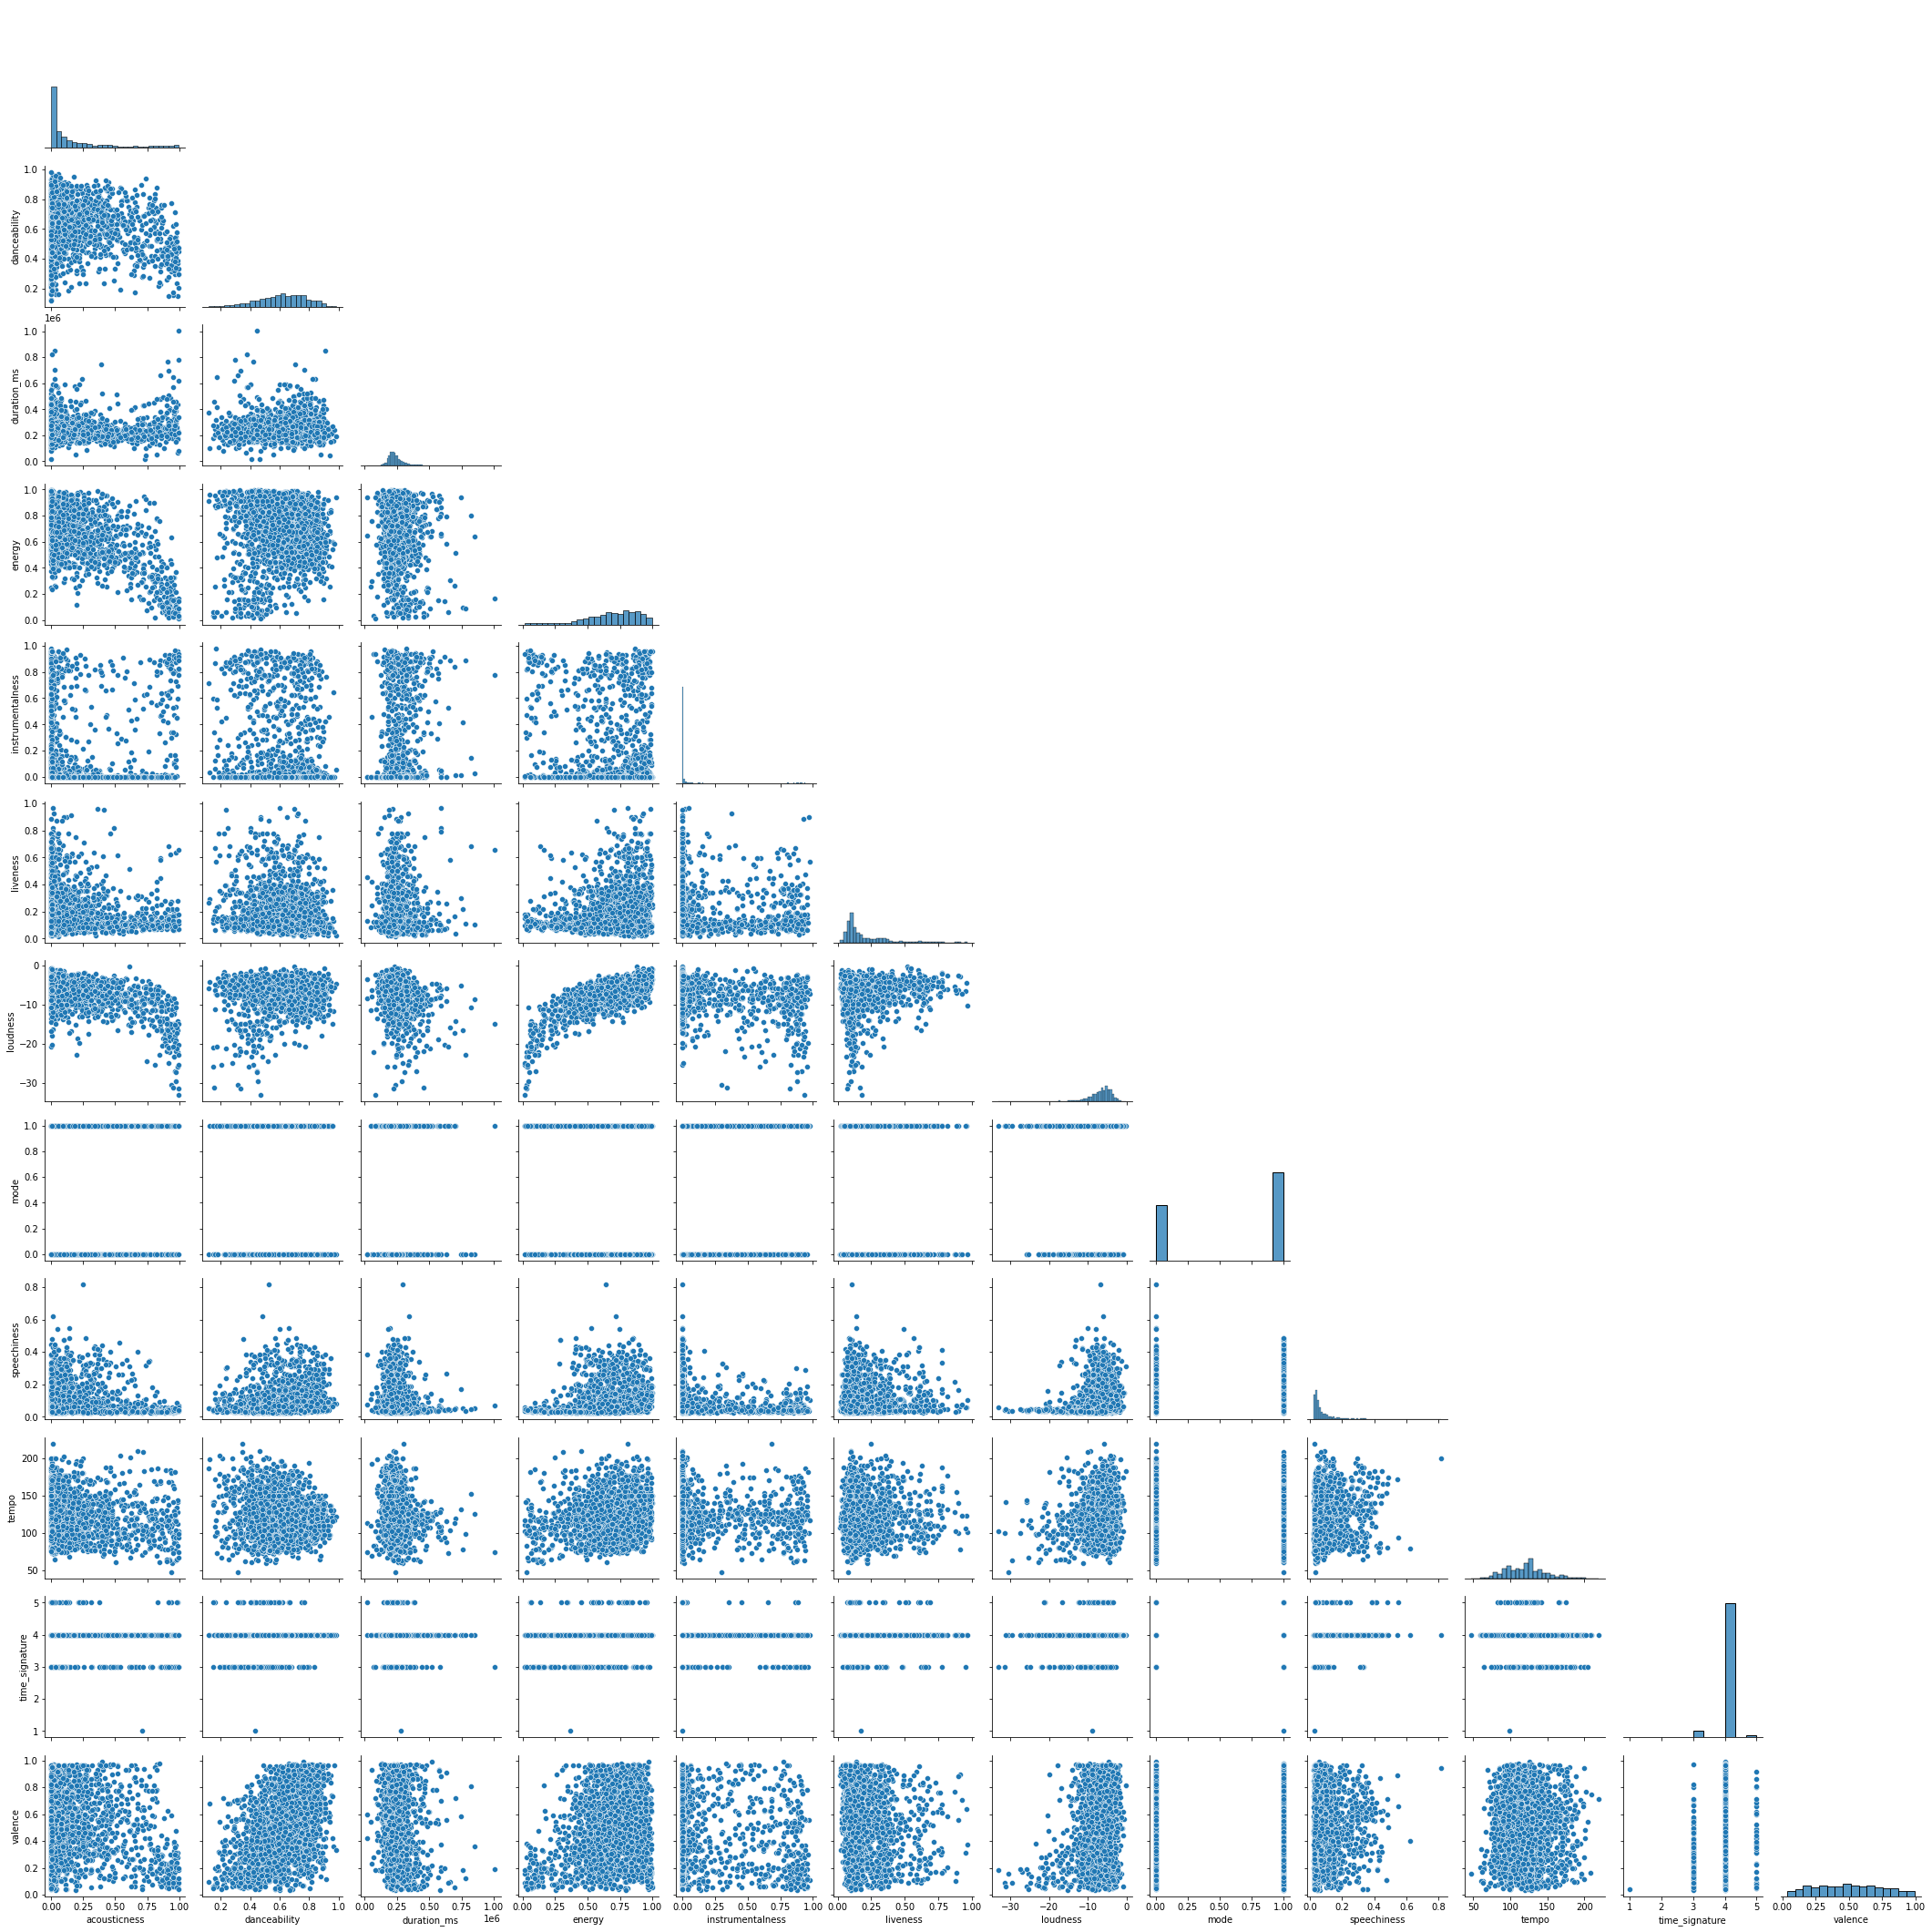

In [29]:
#Realizado a plotagem de toas as potenciais variaveis para ver o comportamento delas.
box = dataset.filter(['acousticness',
                          'danceability',
                          'duration_ms',
                          'energy', 
                          'instrumentalness',
                          'liveness', 
                          'loudness', 
                          'mode',
                          'speechiness',
                          'tempo',
                          'time_signature',
                          'valence'])
sns.pairplot(box, corner=True)

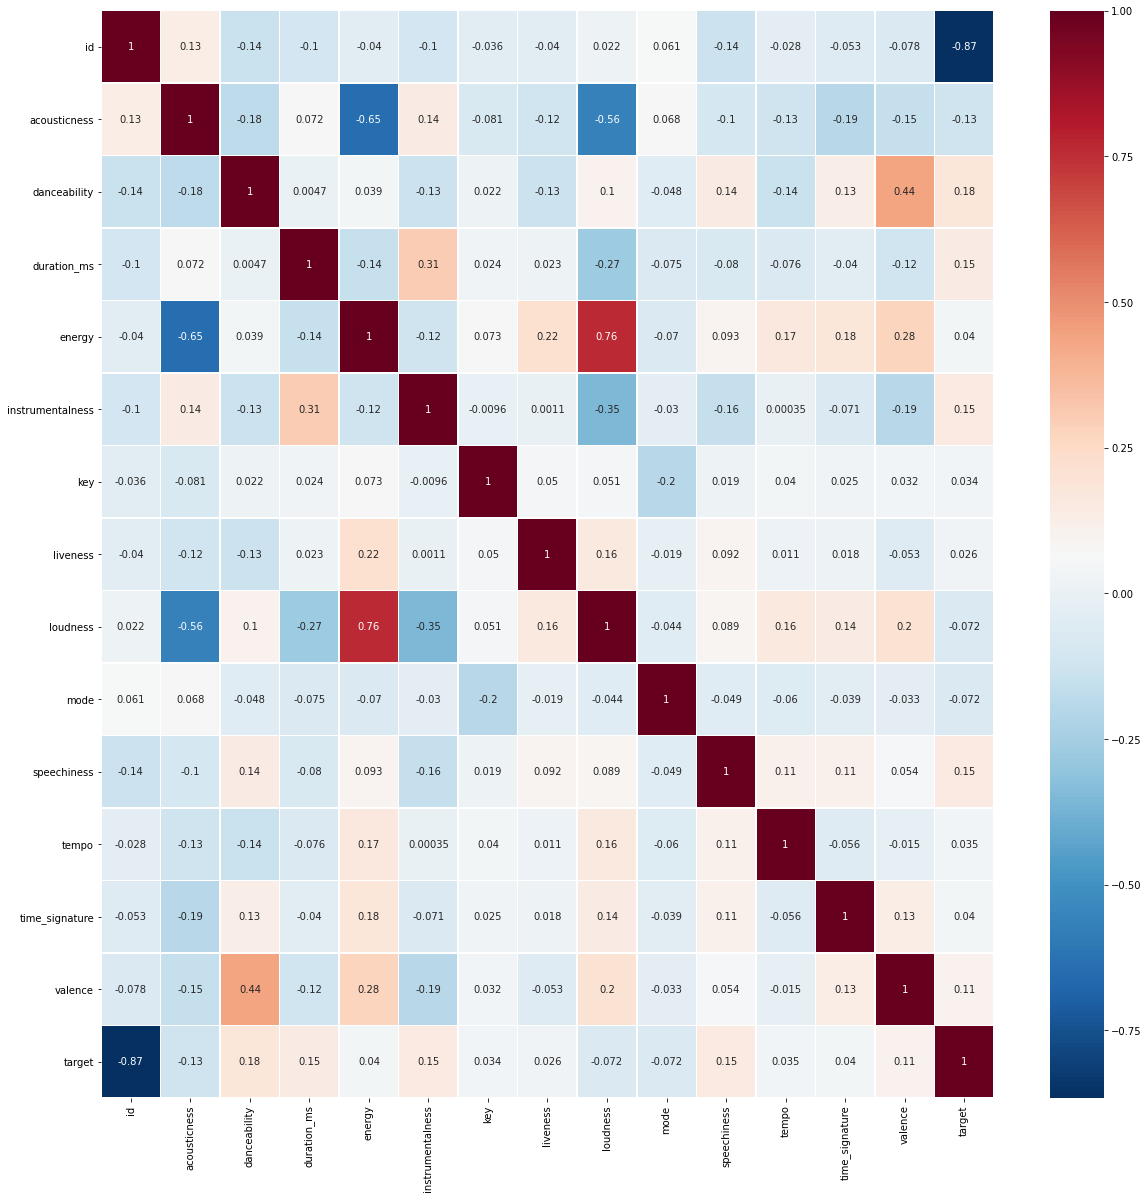

In [22]:
#Plotando uma matrix de correlação
plt.figure(figsize=(20,20))
pearsoncorr = dataset.corr(method='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#sns.heatmap(dataset.corr(), annot=True)

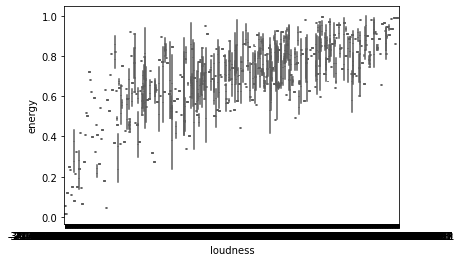

In [23]:
sb.boxplot(x='loudness', y='energy', data=dataset, palette='hls')

> **As variáveis que selecionamos para o modelo foram:**<br>
1-acousticness<br>
2-danceability<br>
4-energy<br>
5-instrumentalness<br>
7-liveness<br>
8-loudness<br>
10-speechiness<br>


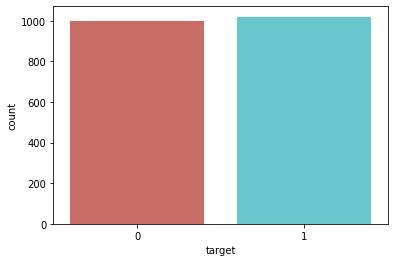

In [24]:
#as variaveis targets estão bem distribuidas e sao binarias
sb.countplot(x='target',data=dataset, palette='hls')

In [25]:
dataset.isnull().sum()

id                  0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

## 3. Preparando para o modelo

In [39]:
#selecionando as colunas escolhidas
X = dataset.iloc[:,[1,2,4,5,7,8,10]].values
#X = dataset.iloc[:,[1,4,6,7,8,9,11,12]].values
y = dataset.iloc[:,14].values

In [40]:
#aplicando o standarScaler para normalizar as variaveis
X = StandardScaler().fit_transform(X)

In [41]:
#Separação do Conjunto de Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [42]:
X_train.shape

(1411, 7)

## 3. Modelando

In [43]:
#Modelo da Rede MLP
model = Sequential()
model.add(Dense(16, input_dim=7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


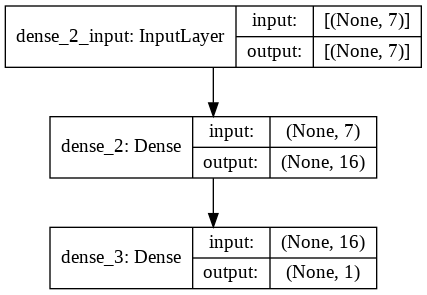

In [45]:
print(model.summary())

plot_model(model, to_file='mlp-seq.png', show_shapes=True, show_layer_names=True)

In [46]:
history  = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
142/142 [==============================] - 1s 1ms/step - loss: 0.7083 - accuracy: 0.5281
Epoch 2/100
142/142 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6259
Epoch 3/100
142/142 [==============================] - 0s 1ms/step - loss: 0.6160 - accuracy: 0.6903
Epoch 4/100
142/142 [==============================] - 0s 1ms/step - loss: 0.5976 - accuracy: 0.6979
Epoch 5/100
142/142 [==============================] - 0s 1ms/step - loss: 0.6093 - accuracy: 0.6720
Epoch 6/100
142/142 [==============================] - 0s 1ms/step - loss: 0.5900 - accuracy: 0.7065
Epoch 7/100
142/142 [==============================] - 0s 1ms/step - loss: 0.5938 - accuracy: 0.6960
Epoch 8/100
142/142 [==============================] - 0s 1ms/step - loss: 0.5914 - accuracy: 0.6993
Epoch 9/100
142/142 [==============================] - 0s 1ms/step - loss: 0.5739 - accuracy: 0.7160
Epoch 10/100
142/142 [==============================] - 0s 1ms/step - loss: 0.5768 - accura

## 4. Avaliando o modelo

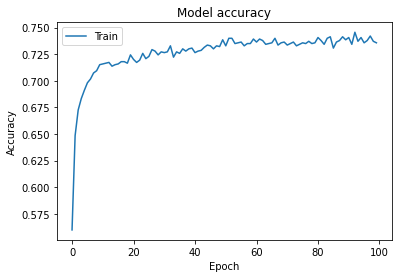

In [47]:
#Processo de teste com 30% dos dados que não foram utilizados no treinamento
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

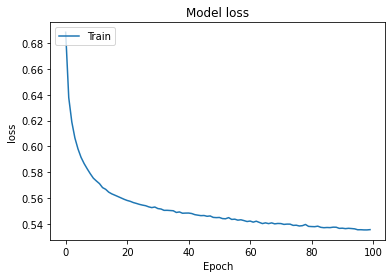

In [48]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [51]:
#Avaliação do Modelo
scores = model.evaluate(X_test, y_test)
print("%s%.2f  "% ("Loss     : ", scores[0]))
print("%s%.2f%s"% ("Accuracy : ", scores[1]*100, "%"))

19/19 [==============================] - 0s 1ms/step - loss: 0.5350 - accuracy: 0.7426
Loss     : 0.53  
Accuracy : 74.26%
